<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%EB%AF%B8%EB%8B%88%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%B3%91%EC%9B%90/%EB%B3%91%EC%9B%90_%EB%85%B8%EC%87%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 읽기 및 확인
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/medical.csv')
df.head()

# 데이터와 컬럼 확인
df.columns

# 정보 확인
# df.info()

# 결측치 확인
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
SMS_received      0
No-show           0
dtype: int64

In [ ]:
# 통계량 이용하여 이상치 제거
print(df.describe(),'\n')  # age 컬럼에 최소값이 -1인 것을 알 수 있음
df = df[df.Age>=0]
df.describe()

          PatientId  AppointmentID            Age   SMS_received
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000
mean   1.474961e+14   5.675305e+06      37.088874       0.321026
std    2.560943e+14   7.129575e+04      23.110205       0.466873
min    3.920000e+04   5.030230e+06      -1.000000       0.000000
25%    4.170000e+12   5.640286e+06      18.000000       0.000000
50%    3.170000e+13   5.680573e+06      37.000000       0.000000
75%    9.440000e+13   5.725524e+06      55.000000       1.000000
max    1.000000e+15   5.790484e+06     115.000000       1.000000 



,PatientId,AppointmentID,Age,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.321029
std,2.560937e+14,7.129544e+04,23.110026,0.466874
min,3.920000e+04,5.030230e+06,0.000000,0.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000
75%,9.440000e+13,5.725523e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [ ]:
# 문자형데이터를 수치형데이터로 바꿉니다. No-Show 변수는 Yes , NO 로 표시
df['No-show'] = df['No-show'].map({'Yes':1, 'No':0})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0


In [ ]:
# ScheduleDay, AppointmentDay는 datetime 타입으로 변환해야 시간차이, 요일 수 등이 가능하므로 변환해주세요.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
SMS_received                    int64
No-show                         int64
dtype: object

In [ ]:
# 환자가 예약을 하고 병원을 방문하는 기간이 어느정도인지 알기 위하여
# (병원예약한날 - 실제병원에방문한날)을 계산 -> AppointmentDay - ScheduledDay
# 일수차이를 구하기 위해서는 dayofyear 속성을 사용한다.
# 일수차이를 구한 값을 새로운 waiting_day 컬럼에 추가.
df['waiting_day'] = df['AppointmentDay'].dt.dayofyear - df['ScheduledDay'].dt.dayofyear
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show,waiting_day
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,0,0
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0


In [ ]:
# 추가된 waiting_day에 이상치가 있는지 확인한다.
# 이상치가 발견되면 다음과 같은 조건으로 처리한다.
# waiting_day가 0과 같거나 큰 값만 추출하여 이상치를 제거한다.
print(df['waiting_day'].describe(),'\n')
df = df[df['waiting_day']>=0]
df['waiting_day'].describe()
# df['waiting_day'] = df[df['waiting_day']>=0]가 틀린 이유?
# -> 필터링 하지 않고 열 자체에 할당하는 동작이므로 ㄴㄴ


count    110526.000000
mean          9.979046
std          15.607516
min        -223.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         146.000000
Name: waiting_day, dtype: float64 



count    110459.000000
mean         10.096878
std          14.803244
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         146.000000
Name: waiting_day, dtype: float64

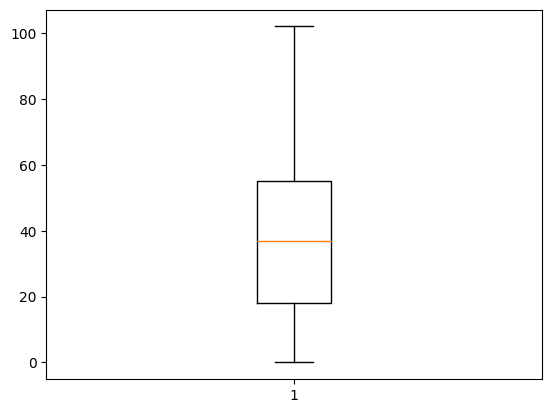

In [ ]:
# Age 값에 대해서 이상이 없는지 확인한다.
# Boxplot으로 시각화 한다.
# Age가 110보다 작거나 같은 범위만 추출하여 이상치를 제거한다.
df['Age'].describe()
df = df[df.Age<=110]
plt.boxplot(df['Age'])
plt.show()

In [ ]:
# 노쇼를 줄이는것이 이번 문제의 핵심이다.
# 이를 위해서는 어떤 변수가 노쇼와 관계가 있는지 파악해야 한다.
# waiting_day(예약하고 방문을 기다리는 기간) No-Show 간의 관계를 알아본다.
# 당일 예약한 환자가 병원에 방문하지 않은 경우는
# 당일예약건수 / 환자가방문하지않은 건수
a = df[df.waiting_day==0]['waiting_day'].value_counts()
b = df[(df['waiting_day']==0) & (df['No-show']==1)]['waiting_day'].value_counts()
b/a

0    0.046472
Name: waiting_day, dtype: float64

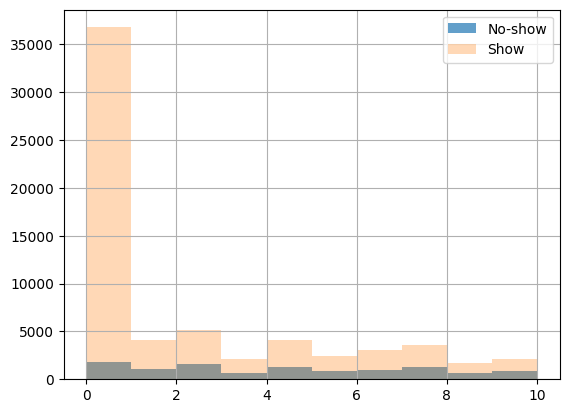

In [ ]:
# 예약한 시점부터 병원방문 날까지 기다리는 날에 따라 노쇼와 노쇼가 아닌 비율이 어떻게 다른지 알기 위해
# 기다리는 날을 10이하로 설정하고 비교하려합니다.
# 이를 위해 먼저 No-Show가 0 (노쇼가 아닌경우), No-Show가 1인 경우로 데이터를 분할한다.
show = df[df['No-show']==0]
no_show = df[df['No-show']==1]

no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='No-show')
# []안은 조건을 의미함! --> no_show에서 waiting_day의 값이 10이하인 waiting_day를 뽑아내라는 뜻
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='Show')
plt.legend()
plt.show()

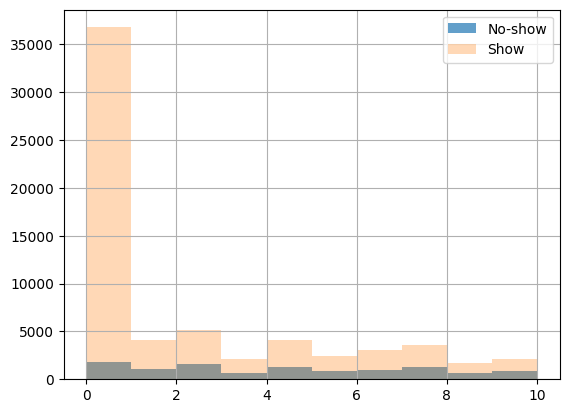

In [ ]:
# 위의 결과를 히스토그램으로 시각화 해보세요.
# 그리고 히스토그램의 결과를 보고 분석을 해보세요.
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='No-show')
# []안은 조건을 의미함! --> no_show에서 waiting_day의 값이 10이하인 waiting_day를 뽑아내라는 뜻
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='Show')
plt.legend()
plt.show()

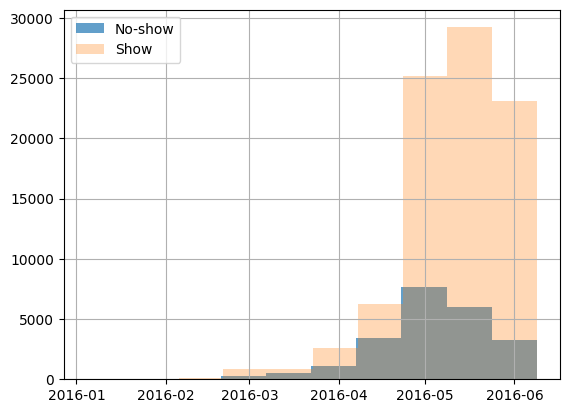

In [ ]:
# ScheduledDay와 No-Show  의 관계를 히스토그램으로 나타내보세요.
# 히스토그램의 결과를 분석해보세요.
no_show['ScheduledDay'].hist(alpha=0.7, label='No-show')
show['ScheduledDay'].hist(alpha=0.3, label='Show')
plt.legend()
plt.show()

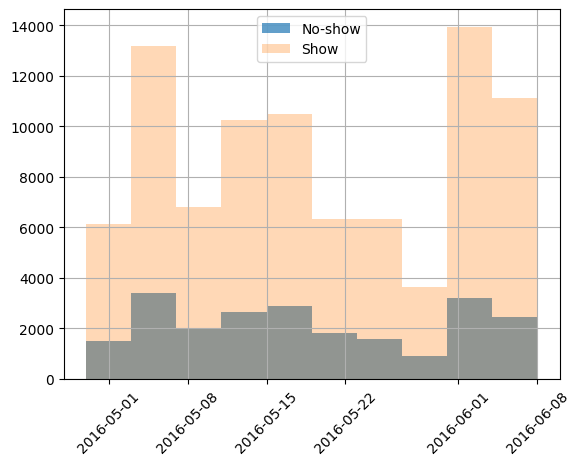

In [ ]:
# AppointmentDay 와 No-Show  의 관계를 히스토그램으로나타내보세요.
#히스토그램의 결과를 분석해보세요.
no_show['AppointmentDay'].hist(alpha=0.7, label='No-show')
show['AppointmentDay'].hist(alpha=0.3, label='Show')
plt.xticks(rotation=45)
plt.legend()
plt.show()

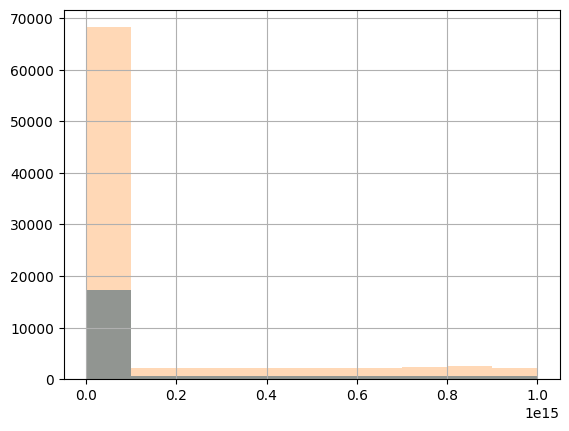

In [ ]:
# 재방문 환자와 No-Show
# 병원에 방문하는 환자중에서 재방문 하는 환자가 있는지 확인하고
# 재방문하는 환자가 예약 잡은 날 병원에 오는 건수와 그렇지 않은 건수를 비교한다.
no_show['PatientId'].hist(alpha=0.7)
show['PatientId'].hist(alpha=0.3)
plt.show()

In [ ]:
#  환자별의 예약횟수를 파악하고 예약횟수 상위10개만 먼저 확인해본다. (PatientId 참조)
df['PatientId'].value_counts().iloc[:10]

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: PatientId, dtype: int64

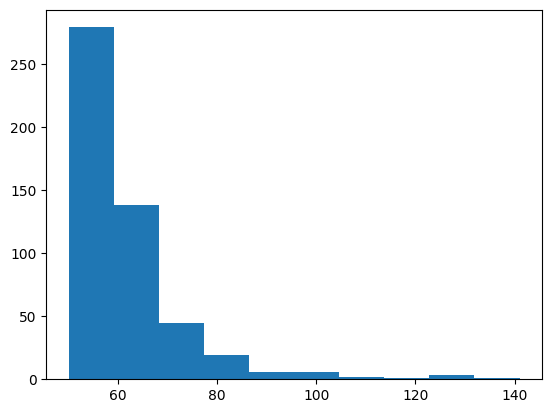

In [ ]:
# 상위 500개의 예약횟수를 확인하기 위해 히스토그램으로 시각화 해본다.
# 히스토그램의 결과를 분석해보세요.
cnt = df['PatientId'].value_counts().iloc[:500]
plt.hist(cnt)
plt.show()  # x축이 재방문 횟수

<Axes: >

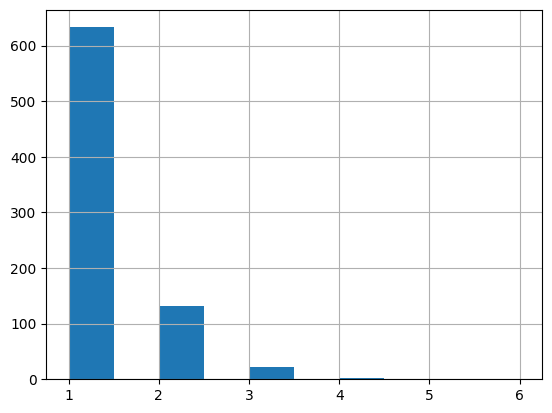

In [ ]:
# 환자별로 기다리는 기간에 따른 노쇼 발생 건수를 확인 하기위해
# waiting_day를 50일 이상 설정하고 결과를 내보세요.
df[(df['waiting_day']>=50) & (df['No-show']==1)].PatientId.value_counts().hist()

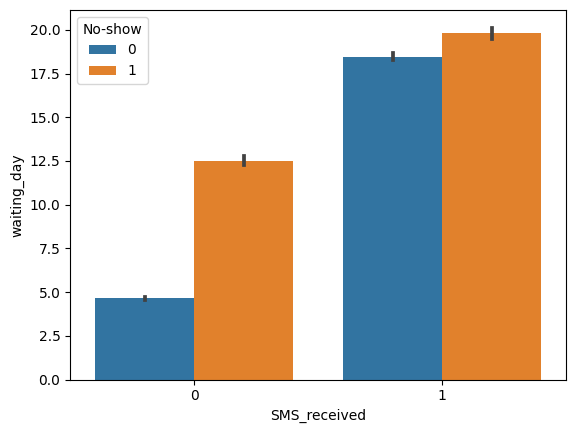

In [ ]:
# SMS_received와 waiting_day와 노쇼의 관계
# barplot 함수를 사용해본다. & 시각화 결과를 분석해보세요.
sns.barplot(x='SMS_received',y='waiting_day',hue='No-show',data=df)
plt.show()

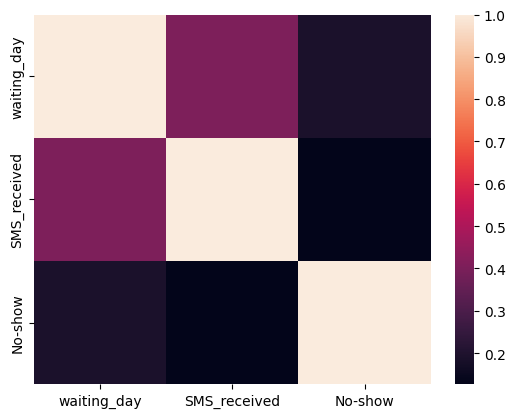

In [ ]:
# 위 과정을 통해서 waiting_day 와 SMS_received 는 서로 영향이 있는것을 알게 되었습니다.
# 실제 어느 정도 상관이 있는지 상관관계를 히트맵으로 나타내보세요.
data1 = df[['waiting_day','SMS_received','No-show']].corr()
sns.heatmap(data1)
plt.show()